# Logistic Regression
- To demonstrate logistic regression, we will create a binary label: Did it snow, or not?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RANDOM_STATE = 25

In [3]:
# Read in data
df = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv')
df = df.set_index('date')

# Create binary snow variable
df['Snow'] = np.where((df['WTEQ_BisonLake'] > 0) | (df['WTEQ_McClurePass'] > 0), 1, 0)
series_pred = df['Snow']
df = df.drop(columns=['WTEQ_BisonLake', 'WTEQ_McClurePass'])
X = df.drop(columns=['Snow']).values
y = df['Snow'].values

# Normalize data
df = (df-df.mean())/df.std()

# display
df['Snow'] = series_pred
display(df)

,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft,Snow
date,,,,,,,
2008-03-12,0.415169,-0.780541,-0.320587,-1.005767,-0.061212,-0.087585,1
2008-03-15,0.460106,-1.221430,-0.320587,-0.995909,-0.034313,-0.087551,1
2008-03-17,0.472362,-1.111968,-0.311604,-0.995909,-0.003572,-0.087577,1
2008-03-18,0.472362,-1.203187,-0.302621,-0.966333,0.000271,-0.087568,1
2008-03-19,0.472362,-0.737972,-0.311604,-0.966333,0.000271,-0.087577,1
...,...,...,...,...,...,...,...
2021-07-23,0.268103,1.208021,0.375604,-0.650859,-0.664505,-0.090355,0
2021-07-24,0.284443,1.107681,0.200433,-0.690293,-0.706774,-0.090407,0
2021-07-25,0.304869,1.065113,0.474418,-0.719869,-0.733672,-0.090518,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Snow'), df['Snow'], test_size=0.2, random_state=RANDOM_STATE)

print(f"{X_train.shape[0]} samples in training data")
print(f"{X_test.shape[0]} samples in testing data")
display(X_train)
display(X_test)

2396 samples in training data
600 samples in testing data


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,
2013-11-07,-1.288350,-0.458236,0.195942,1.370146,1.260654,-0.087105
2011-09-16,2.167711,0.253268,0.761878,1.705337,0.745742,-0.087937
2010-06-25,0.652110,1.277956,-1.488392,-0.621283,-0.015100,-0.086127
2014-05-13,0.525469,-0.920409,1.741037,1.715195,2.332749,2.041110
2021-04-16,-0.152671,-0.956897,1.651206,-2.011341,1.229913,-0.086205
...,...,...,...,...,...,...
2021-05-27,0.076099,0.581655,1.260441,-2.011341,0.983985,-0.085030
2017-11-22,-1.455842,-0.160255,0.707979,-1.173363,0.234671,-0.087285
2019-08-06,2.041070,1.420865,0.451961,-0.118497,-0.783627,-0.090458


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,
2010-06-18,0.652110,1.016463,-0.212790,0.187119,0.868706,-0.084172
2009-12-04,-1.280180,-2.039356,-0.688895,-1.478978,-0.683718,-0.086410
2010-09-24,1.195438,0.499558,-1.012287,-0.700152,-0.983444,-0.089309
2014-03-20,0.035248,-0.601145,-0.127450,1.340570,0.595879,-0.086299
2018-07-25,0.047503,1.326605,-0.365503,-0.217082,-1.421504,-0.092525
...,...,...,...,...,...,...
2009-01-23,-0.418207,-0.573779,-0.572114,-0.552274,-0.422419,-0.089721
2011-11-30,-1.092262,-0.561617,0.537300,1.301136,0.653518,-0.085047
2011-07-10,1.787789,0.864432,1.053829,1.705337,1.306766,-0.087259


In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Model Accuracy: {lr.score(X_test, y_test)}\n")

print("Coefficients:")
for col, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"[{col}] * {round(coef,4)}")

# make dataframe with predictions
df_pred = df.copy()
df_pred['Snow_Prediction'] = lr.predict(df.drop(columns='Snow'))

# confusion matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))

Model Accuracy: 0.9566666666666667

Coefficients:
[PREC_Avg] * -0.0706
[TAVG_Avg] * -3.4961
[soilmoisture_Avg_2ft] * -0.1441
[soilmoisture_Avg_4ft] * -1.7677
[soilmoisture_Avg_8ft] * 3.3042
[soilmoisture_Avg_20ft] * 0.2693


## Multinomial Naive Bayes
- We will utilize the same binary snow label, but using a multinomial naive bayes approach.
- Typically, multinomial naive bayes is used for count-based or discrete feature sets. Gaussian naive bayes, on the other hand, may be more appropriate for our continuous (and somewhat normally distributed) data set. However, we want to test to see how logistic regression compares to multinomial naive bayes for exploration purposes. We will discretize (bin) data to model Multinomial Naive Bayes.
- See next section [*Naive Bayes*](https://flowersanalytics.com/projects/csci5622/csci5622_naivebayes.html) for further testing and discussion

In [6]:
# Read in data
df = pd.read_csv('data/streamflow_prediction_dataset_averaged_cols.csv')
df = df.set_index('date')

# Create binary snow variable
df['Snow'] = np.where((df['WTEQ_BisonLake'] > 0) | (df['WTEQ_McClurePass'] > 0), 1, 0)
series_pred = df['Snow']
df = df.drop(columns=['WTEQ_BisonLake', 'WTEQ_McClurePass'])

# Discretize data for Multinomial Naive Bayes
kbd = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform', 
                       subsample=200000, random_state=RANDOM_STATE)
X_train_discrete = kbd.fit_transform(df.drop(columns=['Snow']))
X_test_discrete = kbd.transform(df.drop(columns=['Snow']))

In [7]:
X_train_discrete, X_test_discrete, y_train, y_test = train_test_split(
    X_train_discrete, series_pred, test_size=0.2, random_state=RANDOM_STATE)

print(f"{X_train_discrete.shape[0]} samples in training data")
print(f"{X_test_discrete.shape[0]} samples in testing data")
display(X_train_discrete)
display(X_test_discrete)

2396 samples in training data
600 samples in testing data


array([[ 2., 10.,  9., 16., 12.,  0.],
       [19., 13., 12., 18., 10.,  0.],
       [12., 17.,  3.,  6.,  7.,  0.],
       ...,
       [19., 18., 11.,  9.,  3.,  0.],
       [15., 17.,  5., 11.,  8.,  0.],
       [ 6.,  7.,  8.,  8.,  7.,  0.]])

array([[12., 16.,  8., 10., 11.,  0.],
       [ 2.,  3.,  6.,  2.,  4.,  0.],
       [14., 14.,  4.,  6.,  3.,  0.],
       ...,
       [17., 16., 13., 18., 12.,  0.],
       [ 2., 10.,  5.,  3.,  2.,  0.],
       [ 9., 13., 12., 15., 10.,  0.]])

In [8]:
mnb = MultinomialNB()

mnb.fit(X_train_discrete, y_train)
print(f'Multinomial Model Accuracy: {mnb.score(X_test_discrete, y_test)}\n')

# confusion matrix
cm_mnb = confusion_matrix(y_test, mnb.predict(X_test_discrete))
print(f'Confusion Matrix:\n{cm_mnb}')

Multinomial Model Accuracy: 0.86

Confusion Matrix:
[[172  24]
 [ 60 344]]


## Model Compare

In [9]:
print(f"Logistic Regression Accuracy: {lr.score(X_test, y_test)}\n")
print(f"Multinomial Naive Bayes Accuracy: {mnb.score(X_test_discrete, y_test)}\n")

Logistic Regression Accuracy: 0.9566666666666667

Multinomial Naive Bayes Accuracy: 0.86



## Visualize

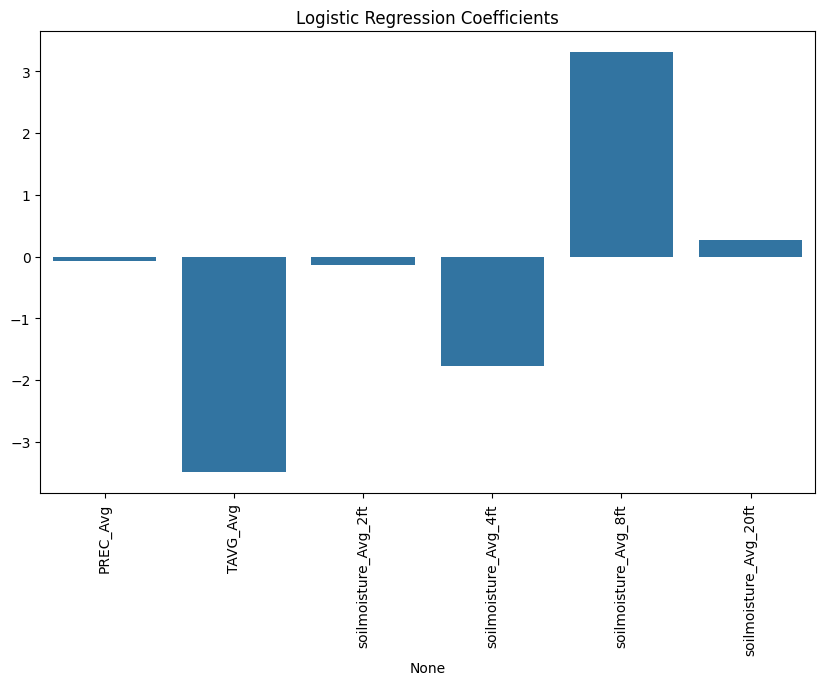

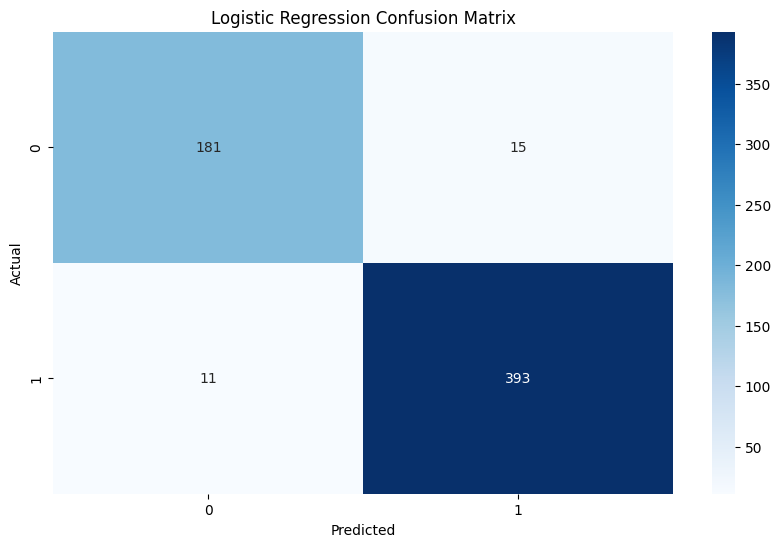

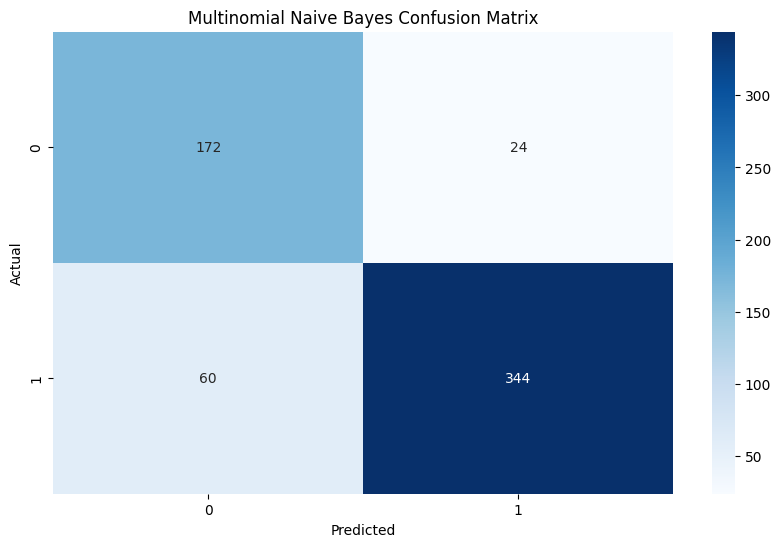

In [10]:
# plot lr coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=lr.coef_[0])
plt.xticks(rotation=90)
plt.title("Logistic Regression Coefficients")
plt.show()

# plot lr confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# plot mnb confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()